# CH05 Classification機器學習實作

### Classifier(分類器)基本觀念

### 1. Decision Tree
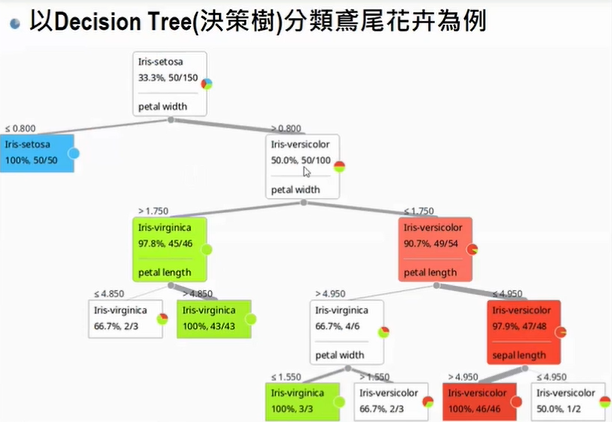
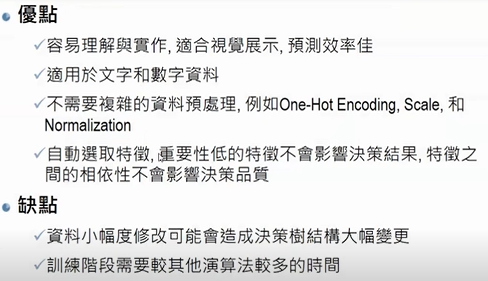

### 2.Logistic Regression 
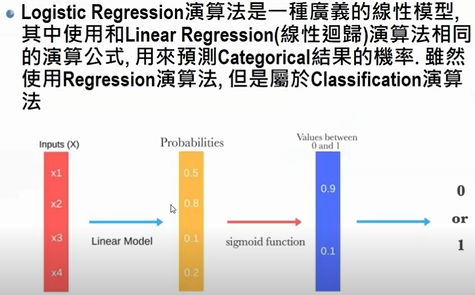
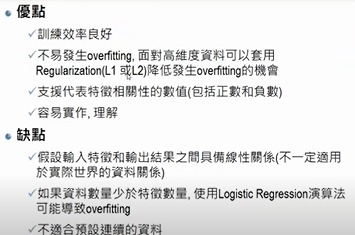

In [2]:
# 補充: Count 的方法用 np.in1d(df.Survived, 1).sum()
import pandas as pd
import numpy as np
import timeit

df = pd.read_csv(r"Datasets\titanic.csv")
display(df)
print(df.shape)
print(df.columns)
print(df.Age.value_counts())
median_age = df.Age.median()
df.Age.fillna(median_age,inplace=True)

def Count():
   return  df[df.Survived ==1].Sex.count()

def Sum():
   return  (df.Survived==1).sum()

def Value_Counts():
    return  (df.Survived==1).value_counts()[1]

def In1D():
    return np.in1d(df.Survived, 1).sum()

print(Count())
print(Sum())
print(Value_Counts())
print(In1D())

CountTimer = timeit.Timer("Count()", "from __main__ import  Count")
print(f"Count 執行時間: {CountTimer.timeit(10)}")

SumTimer = timeit.Timer("Sum()", "from __main__ import  Sum")
print(f"Sum 執行時間: {SumTimer.timeit(10)}")

ValueCountTimer = timeit.Timer("Value_Counts()", "from __main__ import  Value_Counts")
print(f"Value_Counts 執行時間: {ValueCountTimer.timeit(10)}")

In1DTimer = timeit.Timer("In1D()", "from __main__ import  In1D")   # in1D 最快
print(f"In1D 執行時間: {In1DTimer.timeit(10)}")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64
342
342
342
342
Count 執行時間: 0.0068799000000581145
Sum 執行時間: 0.001801599999453174
Value_Counts 執行時間: 0.00648430000001099
In1D 執行時間: 0.0004963999999745283


In [ ]:
## 補充 2 
#Hands-on: Predict Customer Churn(https://towardsdatascience.com/hands-on-predict-customer-churn-5c2a42806266)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import timeit

# Loading the CSV with pandas
df = pd.read_csv(r'Datasets\Telco-Customer-Churn.csv')
print(df)

# Data to plot
sizes = df['Churn'].value_counts(sort = True)
colors = ["blue","red"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=[0.1, 0.1], labels=["No", "Yes"], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

df.drop(['customerID'], axis=1, inplace=True) 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

df=df.apply(LabelEncoder().fit_transform)   #apply LabelEncoder to all Categorical column
print(df)

df["Churn"] = df["Churn"].astype(int)
Y = df["Churn"].values
X = df.drop(labels = ["Churn"],axis = 1)

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# another program test ==============================
kernelLinear = SVC(kernel ='linear')
kernelRBF =SVC(kernel='rbf')

def m1():
   return   kernelRBF.fit(X_train,y_train ) 

def m2():
    return  kernelLinear.fit(X_train,y_train ) 

KernelRBFTimer = timeit.Timer("m1()", "from __main__ import  m1")
print(f"KernelRBF 執行時間: {KernelRBFTimer.timeit(1)}")

KernelLinearTimer = timeit.Timer("m2()", "from __main__ import  m2")
print(f"KernelLinear執行時間: {KernelLinearTimer.timeit(1)}")


### 3.Examplae : 
#### (1)use Logisric Regression 演算法分析客戶流失機率(因素)
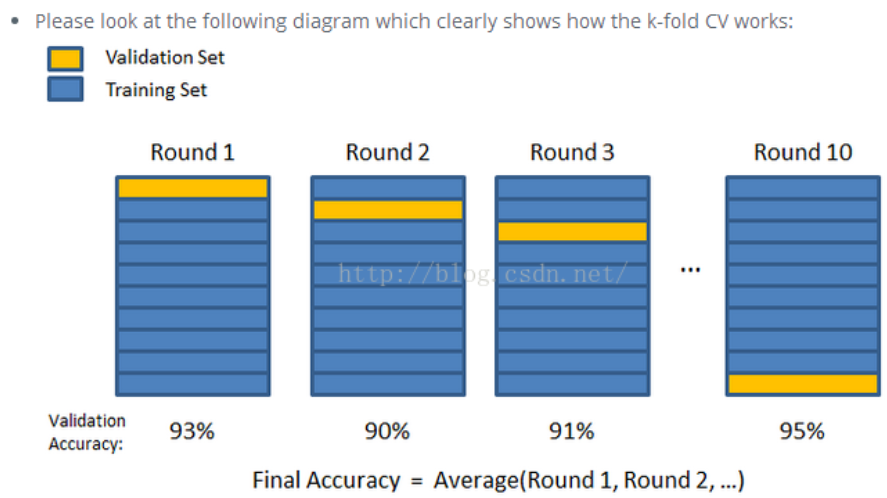
<b> Hands-on: Predict Customer Churn:<br>
    (https://towardsdatascience.com/hands-on-predict-customer-churn-5c2a42806266)</b>

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


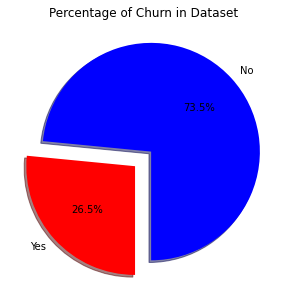

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [3]:
# Step1 :  read , Get , check &  Split Data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics    # 看測試結果用
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import timeit

# 1. Loading the CSV with pandas =========================================
df = pd.read_csv(r'Datasets\Telco-Customer-Churn.csv')  # 客戶流失計畫
display(df) # 7043 rows × 21 columns

# 2. Data to plot pie ===================================================
# value_counts:count Churn 欄位中，每一種值的數量 : count 'No' and 'Yes' 個別的數量
sizes = df['Churn'].value_counts(sort = True) # Churn havw 'No' or 'Yes'，
colors = ["blue","red"] 
rcParams['figure.figsize'] = 5,5
# Plot : 圓餅圖 , explode=[0.1, 0.1] 向外突出，, startangle=270 (順時針轉270度)
plt.pie(sizes, explode=[0.1, 0.1], labels=["No", "Yes"], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

# 3, 準備train & test Data ==============================================
df.drop(['customerID'], axis=1, inplace=True)  # customerID 沒意義不用分析
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')  #轉數值

df=df.apply(LabelEncoder().fit_transform)   #apply LabelEncoder to all Categorical columns
print(df)

df["Churn"] = df["Churn"].astype(int)
Y = df["Churn"].values
X = df.drop(labels = ["Churn"],axis = 1)

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

Accuracy of Logistic Regression is: 0.80
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.70      0.48      0.57       383

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

PaperlessBilling    0.436267
SeniorCitizen       0.277370
MultipleLines       0.097986
InternetService     0.091910
PaymentMethod       0.051415
Partner             0.037377
StreamingTV         0.025813
gender              0.018919
tenure              0.013637
MonthlyCharges      0.002711
TotalCharges       -0.000691
StreamingMovies    -0.016811
DeviceProtection   -0.062090
OnlineBackup       -0.164311
Dependents         -0.171778
OnlineSecurity     -0.218616
TechSupport        -0.231943
Contract           -0.813920
PhoneService       -0.977433
dtype: float64


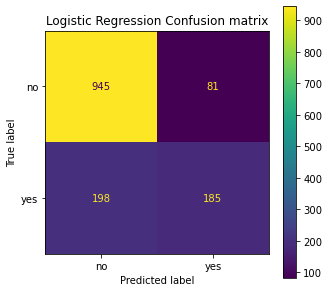

[0.79858156 0.8141844  0.8        0.82102273 0.79545455 0.796875
 0.81392045 0.80397727 0.78977273 0.81107955]
0.8044868230174081


In [7]:
# 4. use Logistic Regression 實作分析: 檢視 accuracy & classification_report ============
# model = LogisticRegression()
name = 'Logistic Regression'
model = LogisticRegression(solver = 'newton-cg')
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
## Print the prediction accuracy
print(f"Accuracy of {name} is: {metrics.accuracy_score(y_test, prediction_test):2.2f}")
# 搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，
# 其精度为20/30 = 2/3，而其召回率为20/60 = 1/3
print(metrics.classification_report(y_test, prediction_test))

# 5.Check 特徵的係數，判斷哪些Features 是重要的: 正數正相關，負數負相關 ====================
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending = False)) # 分析那些特徵正相關高(重要)

# 6. draw confusion matrix ============================================================
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                    display_labels= ['no', 'yes'],
                                     cmap=plt.cm.register_cmap('Choppy'),
                                     normalize=None)
disp.ax_.set_title(f'{name} Confusion matrix');
plt.show()

scores = cross_val_score(model, X, Y, cv=10) # K-Fold Cross Validation :cv=10 重複10次
print(scores)
print(scores.mean())

### (2) use Guassian Naive Bayes Classifier
1.貝氏分類器是假設在特徵之間獨立的條件下(不存在關聯性)用條件機率運算来进行分类 
2.貝氏定理是機率論的一種定理，描述在已知某些條件下，計算某個特定事件發生的機率為何
3.可以用在垃圾郵件分類(文字)

Accuracy of Gaussian Naive Bayes is: 0.750
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1026
           1       0.53      0.68      0.60       383

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.77      0.75      0.76      1409



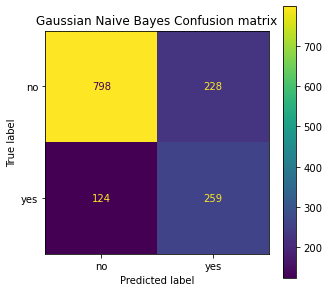

[0.75319149 0.75319149 0.75886525 0.76420455 0.75994318 0.72585227
 0.75568182 0.76420455 0.74005682 0.76704545]
0.7542236863313991


In [9]:
# 4. use Gaussian Naive Bayes 實作分析: 檢視 accuracy & classification_report ============
name = 'Gaussian Naive Bayes'
model = GaussianNB()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
## Print the prediction accuracy
print(f"Accuracy of {name} is: {metrics.accuracy_score(y_test, prediction_test):3.3f}")
print(metrics.classification_report(y_test, prediction_test))
# 搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，
# 其 precision 精度为20/30 = 2/3，而其recall召回率为20/60 = 1/3

# 5.Check 特徵的係數，判斷哪些Features 是重要的: 正數正相關，負數負相關 ====================
#weights = pd.Series(model.coef_[0], index=X.columns.values)
# print(weights.sort_values(ascending = False)) # 分析那些特徵正相關高(重要)

# 6. draw confusion matrix ============================================================
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                    display_labels= ['no', 'yes'],
                                     cmap=plt.cm.register_cmap('Choppy'),
                                     normalize=None)
disp.ax_.set_title(f'{name} Confusion matrix');
plt.show()

scores = cross_val_score(model, X, Y, cv=10) # K-Fold Cross Validation :cv=10 重複10次
print(scores)
print(scores.mean())

### (3) Linear Discriminant Analysis Classifier (LDA):線性判斷式分析
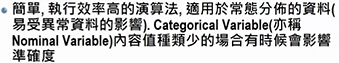
整個LDA的算式只是在算一個二次函數的差值，稱為二次式區別分析(quadratic discriminant analysis)。
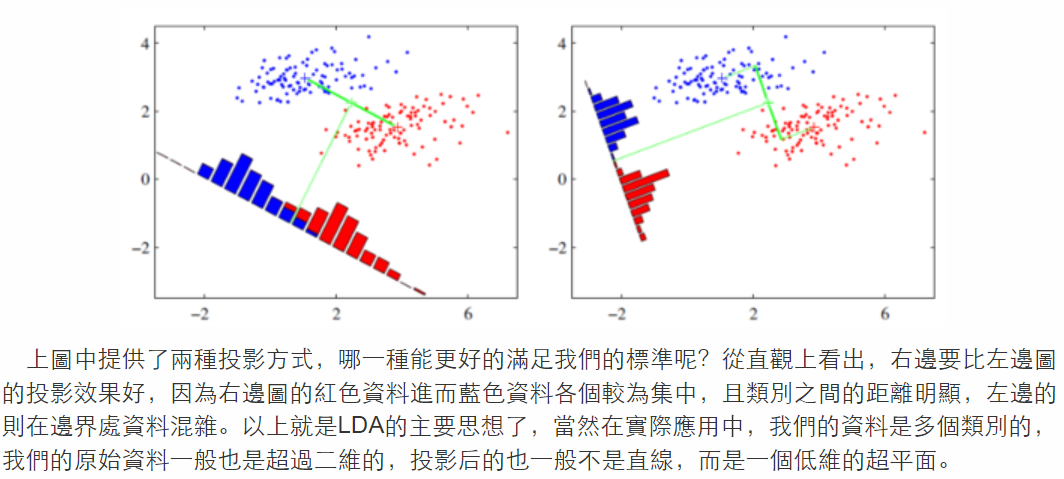
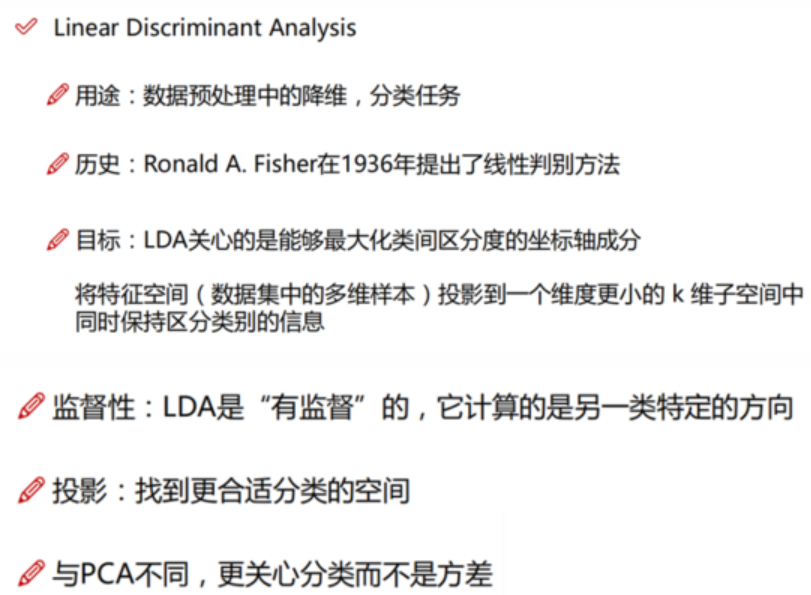

Accuracy of Linear Discriminant is: 0.800
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.68      0.49      0.57       383

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



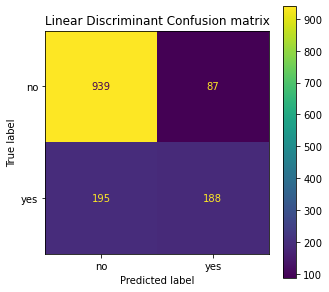

[0.79432624 0.81276596 0.80425532 0.81960227 0.796875   0.79545455
 0.81818182 0.80255682 0.78551136 0.80681818]
0.8036347517730495


In [10]:
# 4. use Linear Discriminant 實作分析: 檢視 accuracy & classification_report ============
name = 'Linear Discriminant'
model =  LinearDiscriminantAnalysis()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
## Print the prediction accuracy
print(f"Accuracy of {name} is: {metrics.accuracy_score(y_test, prediction_test):3.3f}")
print(metrics.classification_report(y_test, prediction_test))
# 搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，
# 其 precision 精度为20/30 = 2/3，而其recall召回率为20/60 = 1/3

# 5.Check 特徵的係數，判斷哪些Features 是重要的: 正數正相關，負數負相關 ====================
#weights = pd.Series(model.coef_[0], index=X.columns.values)
# print(weights.sort_values(ascending = False)) # 分析那些特徵正相關高(重要)

# 6. draw confusion matrix ============================================================
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                    display_labels= ['no', 'yes'],
                                     cmap=plt.cm.register_cmap('Choppy'),
                                     normalize=None)
disp.ax_.set_title(f'{name} Confusion matrix');
plt.show()

scores = cross_val_score(model, X, Y, cv=10) # K-Fold Cross Validation :cv=10 重複10次
print(scores)
print(scores.mean())

<b> PS: The bottom row demonstrates that Linear Discriminant Analysis can only learn linear boundaries, while Quadratic Discriminant Analysis can learn quadratic boundaries and is therefore more flexible.</b>
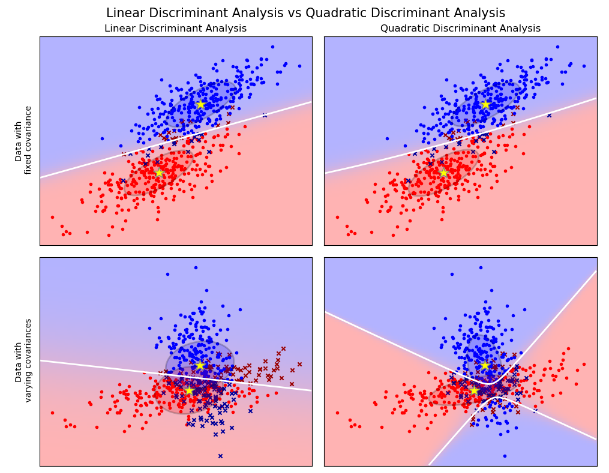

### (4) Quadratic Discriminant Analysis Classifier (QDA)
* 適用於資料呈常態分布，但是特徵較多的場合(計算較費時) Quadratic : 二次的,二次方程式

Accuracy of Quadratic Discriminant is: 0.776
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1026
           1       0.57      0.68      0.62       383

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.78      1409



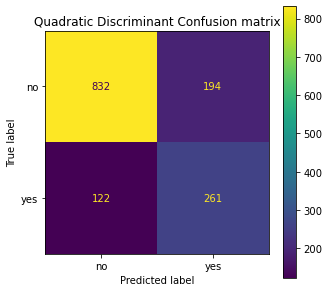

[0.76453901 0.79007092 0.77588652 0.79261364 0.77414773 0.74431818
 0.78125    0.77982955 0.77556818 0.78125   ]
0.7759473726627982


In [11]:
# 4. use Quadratic Discriminant Analysis實作分析: 檢視 accuracy & classification_report ============
name = 'Quadratic Discriminant'
model =  QuadraticDiscriminantAnalysis()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
## Print the prediction accuracy
print(f"Accuracy of {name} is: {metrics.accuracy_score(y_test, prediction_test):3.3f}")
print(metrics.classification_report(y_test, prediction_test))
# 搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，
# 其 precision 精度为20/30 = 2/3，而其recall召回率为20/60 = 1/3

# 5.Check 特徵的係數，判斷哪些Features 是重要的: 正數正相關，負數負相關 ====================
#weights = pd.Series(model.coef_[0], index=X.columns.values)
# print(weights.sort_values(ascending = False)) # 分析那些特徵正相關高(重要)

# 6. draw confusion matrix ============================================================
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                    display_labels= ['no', 'yes'],
                                     cmap=plt.cm.register_cmap('Choppy'),
                                     normalize=None)
disp.ax_.set_title(f'{name} Confusion matrix');
plt.show()

scores = cross_val_score(model, X, Y, cv=10) # K-Fold Cross Validation :cv=10 重複10次
print(scores)
print(scores.mean())

### (5) K-Neighbors Classifier : 概念找最近的鄰居: 
<b> 計算距離=>選取最近的K 個鄰居=>投票決定哪一類(分類)</b>
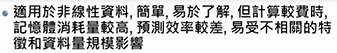    

Accuracy of KNeighbors Classifier is: 0.749
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1026
           1       0.55      0.40      0.47       383

    accuracy                           0.75      1409
   macro avg       0.68      0.64      0.65      1409
weighted avg       0.73      0.75      0.74      1409



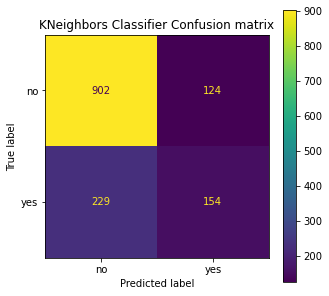

[0.74751773 0.76028369 0.79716312 0.77272727 0.76846591 0.765625
 0.78125    0.74715909 0.76420455 0.77556818]
0.7679964539007091


In [12]:
# 4. use K-Neighbors Classifier 實作分析: 檢視 accuracy & classification_report ============
name = 'KNeighbors Classifier'
model =  KNeighborsClassifier()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
## Print the prediction accuracy
print(f"Accuracy of {name} is: {metrics.accuracy_score(y_test, prediction_test):3.3f}")
print(metrics.classification_report(y_test, prediction_test))
# 搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，
# 其 precision 精度为20/30 = 2/3，而其recall召回率为20/60 = 1/3

# 5.Check 特徵的係數，判斷哪些Features 是重要的: 正數正相關，負數負相關 ====================
#weights = pd.Series(model.coef_[0], index=X.columns.values)
# print(weights.sort_values(ascending = False)) # 分析那些特徵正相關高(重要)

# 6. draw confusion matrix ============================================================
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                    display_labels= ['no', 'yes'],
                                     cmap=plt.cm.register_cmap('Choppy'),
                                     normalize=None)
disp.ax_.set_title(f'{name} Confusion matrix');
plt.show()

scores = cross_val_score(model, X, Y, cv=10) # K-Fold Cross Validation :cv=10 重複10次
print(scores)
print(scores.mean())

### (6) use Support Vector Machine(SVM):支持向量機
三階段 : 目標(是極大化兩邊的距離& 需 >=1)-> 轉換 -> 實現 -> 回到目標 -> .
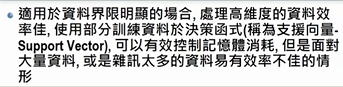..

Accuracy of Support Vector Machine is: 0.781
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1026
           1       0.73      0.30      0.43       383

    accuracy                           0.78      1409
   macro avg       0.76      0.63      0.65      1409
weighted avg       0.77      0.78      0.75      1409



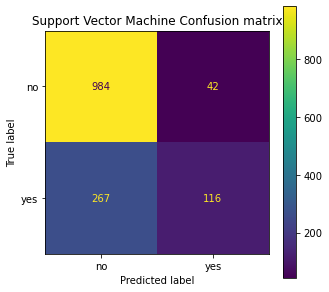

[0.78723404 0.7858156  0.76879433 0.78551136 0.77556818 0.77982955
 0.796875   0.78409091 0.77840909 0.79545455]
0.7837582607994842


In [15]:
# 4. use Support Vector Machine 實作分析: 檢視 accuracy & classification_report ============
name = 'Support Vector Machine'
model = SVC(kernel='rbf')
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
## Print the prediction accuracy
print(f"Accuracy of {name} is: {metrics.accuracy_score(y_test, prediction_test):3.3f}")
print(metrics.classification_report(y_test, prediction_test))
# 搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，
# 其 precision 精度为20/30 = 2/3，而其recall召回率为20/60 = 1/3

# 5.Check 特徵的係數，判斷哪些Features 是重要的: 正數正相關，負數負相關 ====================
#weights = pd.Series(model.coef_[0], index=X.columns.values)
# print(weights.sort_values(ascending = False)) # 分析那些特徵正相關高(重要)

# 6. draw confusion matrix ============================================================
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                    display_labels= ['no', 'yes'],
                                     cmap=plt.cm.register_cmap('Choppy'),
                                     normalize=None)
disp.ax_.set_title(f'{name} Confusion matrix');
plt.show()

scores = cross_val_score(model, X, Y, cv=10) # K-Fold Cross Validation :cv=10 重複10次
print(scores)
print(scores.mean())

### (7) Decision Tree : 決策樹  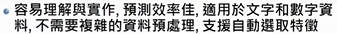

Accuracy of Decision Tree is: 0.776
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1026
           1       0.66      0.36      0.46       383

    accuracy                           0.78      1409
   macro avg       0.73      0.64      0.66      1409
weighted avg       0.76      0.78      0.75      1409



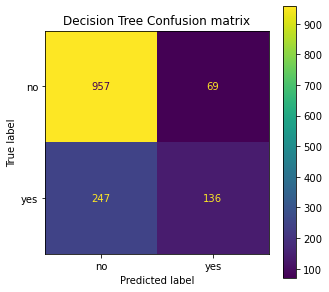

[0.78723404 0.77304965 0.77588652 0.77698864 0.76846591 0.75284091
 0.79545455 0.78551136 0.76988636 0.80539773]
0.7790715667311412


In [14]:
# 4. use Decision Tree Classifier 實作分析: 檢視 accuracy & classification_report ============
name = 'Decision Tree'
model =  DecisionTreeClassifier(max_depth = 3, random_state = 1)
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
## Print the prediction accuracy
print(f"Accuracy of {name} is: {metrics.accuracy_score(y_test, prediction_test):3.3f}")
print(metrics.classification_report(y_test, prediction_test))
# 搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，
# 其 precision 精度为20/30 = 2/3，而其recall召回率为20/60 = 1/3

# 5.Check 特徵的係數，判斷哪些Features 是重要的: 正數正相關，負數負相關 ====================
#weights = pd.Series(model.coef_[0], index=X.columns.values)
# print(weights.sort_values(ascending = False)) # 分析那些特徵正相關高(重要)

# 6. draw confusion matrix ============================================================
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                    display_labels= ['no', 'yes'],
                                     cmap=plt.cm.register_cmap('Choppy'),
                                     normalize=None)
disp.ax_.set_title(f'{name} Confusion matrix');
plt.show()

scores = cross_val_score(model, X, Y, cv=10) # K-Fold Cross Validation :cv=10 重複10次
print(scores)
print(scores.mean())